# Github Analysis: Analyzing issues.

In this notebook, we explore the features available through the issues api on Github.  Through the issues api we can access: timestamps, number of comments, author affiliation, and tags.

After a sufficient representation of the issues as tidy we may access more in the comments and events endpoints.

In [222]:
from deathbeds.___018_08_25_Moving_github_data_into_dataframes import issues
from deathbeds.___018_08_28_A_dataframe_to_explain_models import FramePipe
from matplotlib.pyplot import *
import pandas, numpy as np
%matplotlib inline
__all__ = 'df', 

import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 6)

from sklearn import preprocessing
from toolz.curried import *

# Load a bunch of issues in as tidy data.

In [223]:
df = pandas.concat(
    list(issues('jupyterlab/jupyterlab', iter=100, state='open')) + list(issues('jupyterlab/jupyterlab', iter=58))
)
times = [object for object in df.columns if object.endswith('_at')]
df[times] = df[times].applymap(pandas.to_datetime)
df = df.set_index('created_at').sort_index().drop_duplicates('id')
df['closed'] = ~df.closed_at.apply(np.isnat).rename('closed')
df['pr'] = df.pull_request.fillna(False).apply(bool)
df.sample(2).iloc[:, 3:]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,body,closed_at,comments,comments_url,events_url,html_url,id,labels,labels_url,locked,...,number,pull_request,repository_url,state,title,updated_at,url,user,closed,pr
created_at,,,,,,,,,,,,,,,,,,,,,
2018-03-29 06:24:11,,2018-03-29 16:26:31,1,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/pull/...,309633399,[],https://api.github.com/repos/jupyterlab/jupyte...,False,...,4270,{'url': 'https://api.github.com/repos/jupyterl...,https://api.github.com/repos/jupyterlab/jupyte...,closed,Fix typos in virtual DOM documentation,2018-03-29 16:26:31,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'juniorrojas', 'id': 2767767, 'node_...",True,True
2018-03-17 15:32:43,"Currently we can, for example, open a notebook...",NaT,2,https://api.github.com/repos/jupyterlab/jupyte...,https://api.github.com/repos/jupyterlab/jupyte...,https://github.com/jupyterlab/jupyterlab/issue...,306165454,"[{'id': 392845098, 'node_id': 'MDU6TGFiZWwzOTI...",https://api.github.com/repos/jupyterlab/jupyte...,False,...,4201,NaN,https://api.github.com/repos/jupyterlab/jupyte...,open,Only open one model of a file at a time,2018-03-19 15:50:20,https://api.github.com/repos/jupyterlab/jupyte...,"{'login': 'jasongrout', 'id': 192614, 'node_id...",False,False


The information below shows all of the columns and unique values in the current dataframe.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2652 entries, 2016-06-10 18:23:46 to 2018-08-29 13:32:49
Data columns (total 25 columns):
assignee              284 non-null object
assignees             2652 non-null object
author_association    2652 non-null object
body                  2651 non-null object
closed_at             1710 non-null datetime64[ns]
comments              2652 non-null int64
comments_url          2652 non-null object
events_url            2652 non-null object
html_url              2652 non-null object
id                    2652 non-null int64
labels                2652 non-null object
labels_url            2652 non-null object
locked                2652 non-null bool
milestone             1761 non-null object
node_id               2652 non-null object
number                2652 non-null int64
pull_request          963 non-null object
repository_url        2652 non-null object
state                 2652 non-null object
title                 2652 non-null obj

In [69]:
AUTHOR = 'author_association'
Γ = pandas.Grouper(freq='M')

In [71]:
DAILY = pandas.DatetimeIndex(start=df.index.min(), end=df.closed_at.max(), freq='D').round('D')

In [111]:
opened = pandas.DataFrame(np.less_equal(df.index.fillna(pandas.to_datetime('now'))[:, None], DAILY), df.index, DAILY)
closed = pandas.DataFrame(np.less_equal(df.closed_at.fillna(pandas.to_datetime('now'))[:, None], DAILY), df.index, DAILY)

* A comparison between open and closed issues over time.

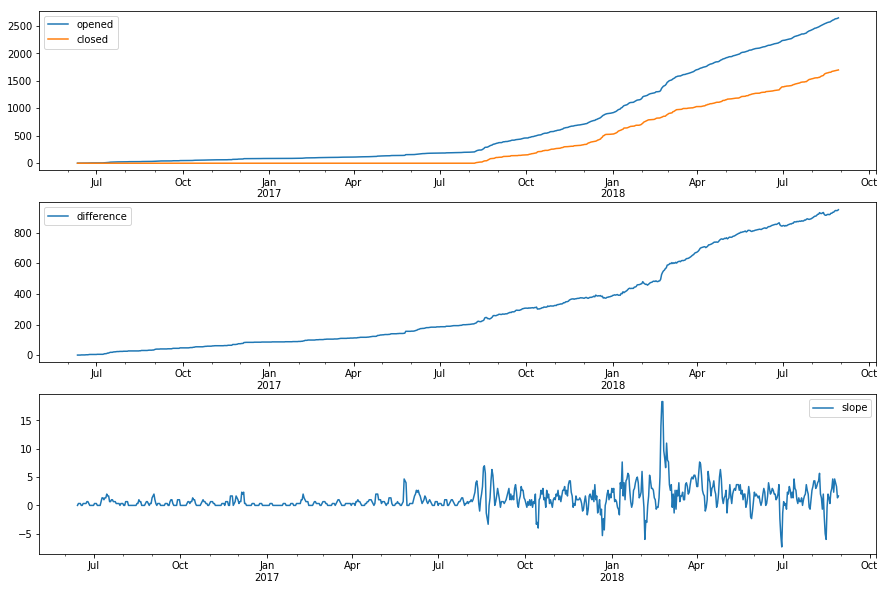

In [109]:
subplot(3,1,1)
opened.sum().rename('opened').plot(legend=True)
closed.sum().rename('closed').plot(legend=True, ax=gca())
subplot(3,1,2)
(opened.sum() - closed.sum()).rename('difference').plot(legend=True)
subplot(3,1,3)
(opened.sum() - closed.sum()).diff().rolling(3).mean().rename('slope').plot(legend=True)
gcf().set_size_inches((15, 10))

> The `difference` compares the number of open issues at a time to closed issues.  The `slope` is the change in the `difference` : `positive` slopes indicates more

* A similar analysis on the issues that are pull requests.

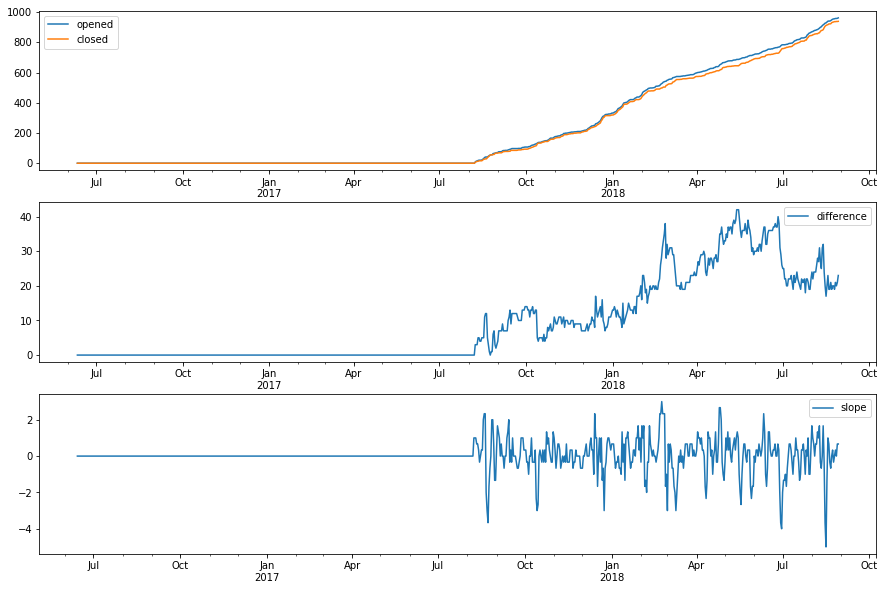

In [110]:
subplot(3,1,1)
opened[df.pr].sum().rename('opened').plot(legend=True)
closed[df.pr].sum().rename('closed').plot(legend=True, ax=gca())
subplot(3,1,2)
(opened[df.pr].sum() - closed[df.pr].sum()).rename('difference').plot(legend=True)
subplot(3,1,3)
(opened[df.pr].sum() - closed[df.pr].sum()).diff().rolling(3).mean().rename('slope').plot(legend=True)
gcf().set_size_inches((15, 10))

* A psuedo gaant chart of closed issues

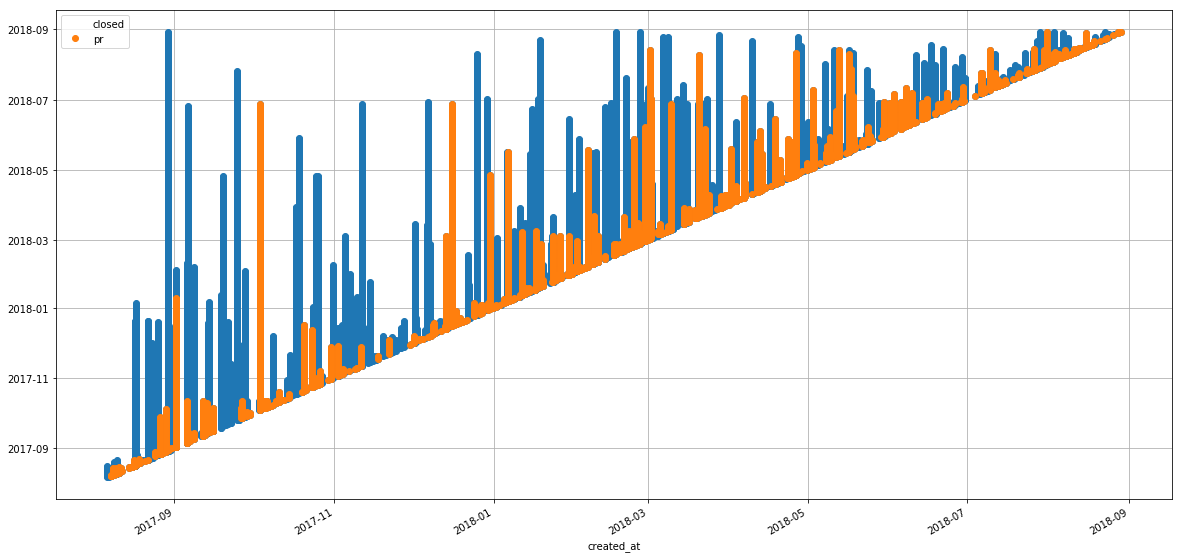

In [137]:
gaant = opened^closed

gaant[df.closed].stack().pipe(lambda s: s[s]).to_frame()[[]].reset_index(-1)['level_1'].rename('closed').plot(
    figsize=(20, 10), style=['o'], grid=True, legend=True)
gaant[np.logical_and(df.closed, df.pr)].stack().pipe(lambda s: s[s]).to_frame()[[]].reset_index(-1)['level_1'].rename('pr').plot(
    figsize=(20, 10), style=['o'], grid=True, ax=gca(), legend=True)


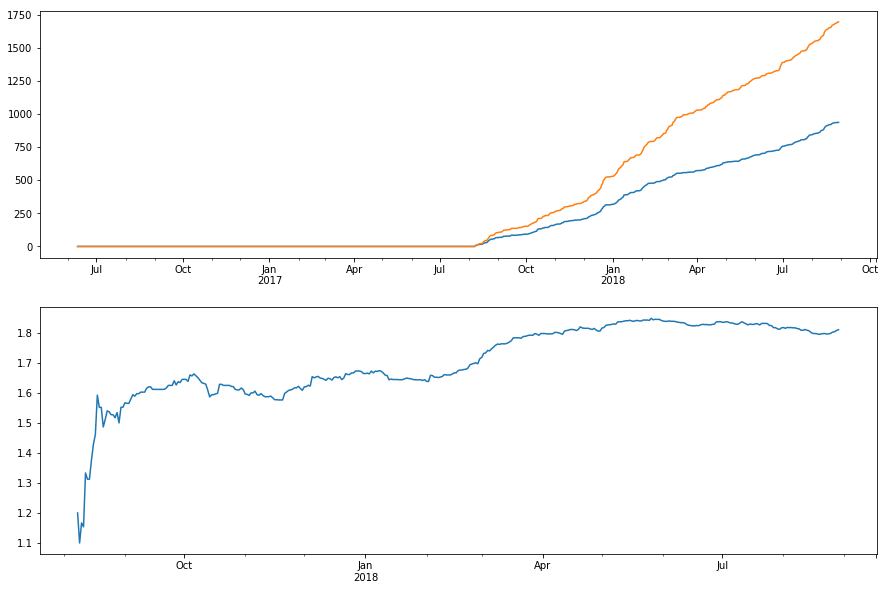

In [174]:
subplot(2,1,1)
closedissues = closed[df.closed].sum().rename('closed issues')
closedprs = closed[np.logical_and(df.closed, df.pr)].sum().rename('closed prs')
closedprs.plot(ax=gca())
closedissues.plot(ax=gca())
subplot(2,1,2)
(closedissues/closedprs).plot()
gcf().set_size_inches((15, 10))

> The bottom plot shows the ratio of issues to pull requests.  For this specific case there is 1.75 rate of closed issues for every one pull request.

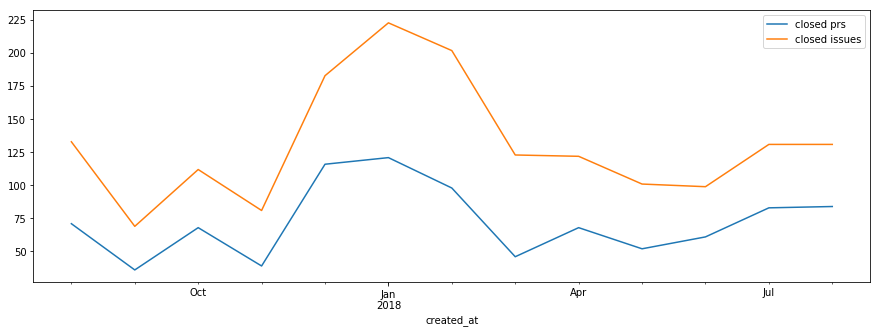

In [176]:
df.pr[df.closed].groupby(Γ).agg(('sum', 'count')).rename({'sum': 'closed prs', 'count': 'closed issues' }, axis=1).plot()
gcf().set_size_inches((15, 5))

* Response times

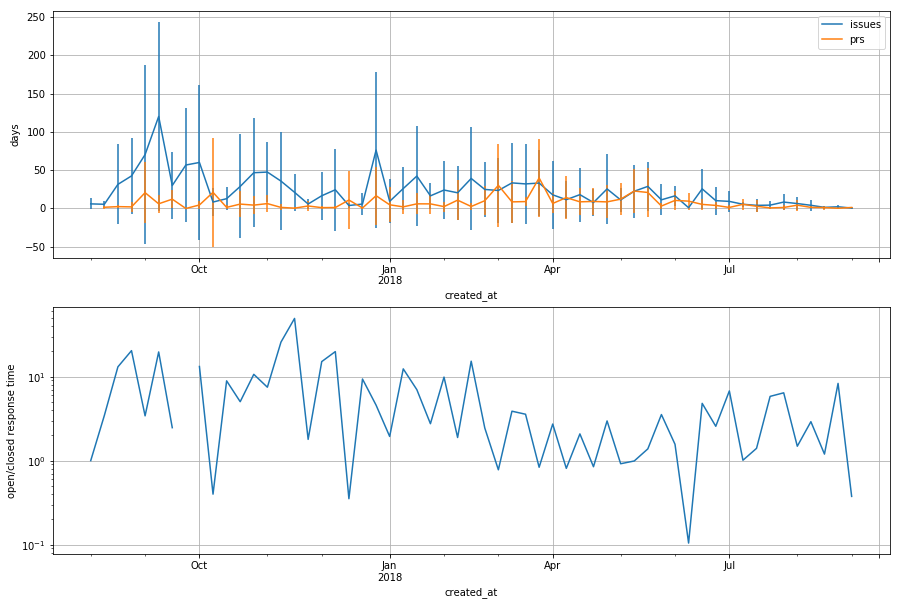

In [256]:
subplot(2,1,1)
W = pandas.Grouper(freq='W')
closed_response = gaant[np.logical_and(df.closed, ~df.pr)].astype(int).sum(axis=1).groupby(W).describe()
open_response = gaant[np.logical_and(df.closed, df.pr)].astype(int).sum(axis=1).groupby(W).describe()
closed_response.pipe(lambda df: df['mean'].rename('issues').plot(yerr=df['std'], legend=True, grid=True))
open_response.pipe(lambda df: df['mean'].rename('prs').plot(yerr=df['std'], ax=gca(), legend=True, grid=True))
gca().set_ylabel('days');
subplot(2,1,2)
(closed_response['mean'] / open_response['mean']).fillna(1).plot(grid=True, logy=True)
gcf().set_size_inches((15, 10))
gca().set_ylabel("open/closed response time");

> If issues are growing faster than PR's by 1.75 and issues and prs are being closed at the same rate then there will always be a deficit?

>> What ideas could bend one of these slopes in a more favorable direction?  Recommendation systems?  Active learning?

In [224]:
collaborators = df.closed.groupby([Γ, df.closed, df.author_association]).count().unstack().swaplevel(1,0).fillna(0)

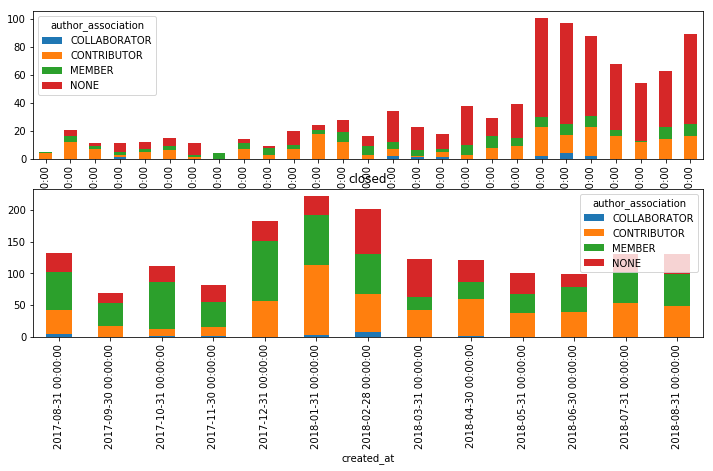

In [225]:
subplot(2,1,1)
collaborators.loc[False].plot(kind='bar', stacked=True, ax=gca())
subplot(2,1,2)
collaborators.loc[True].plot(kind='bar', stacked=True, ax=gca(), title='closed')

* Contributions expressed as ratios

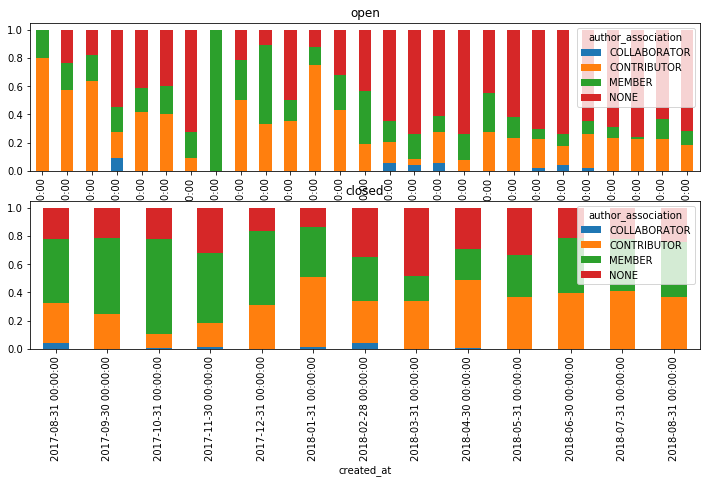

In [220]:
subplot(2,1,1)
collaborators.loc[False].apply(lambda s: s/s.sum(), axis=1).plot(kind='bar', stacked=True, ax=gca(), title='open')
subplot(2,1,2)
collaborators.loc[True].apply(lambda s: s/s.sum(), axis=1).plot(kind='bar', stacked=True, ax=gca(), title='closed')

> Affiliated (member, contributor, & collaborator) members initialized more successful issues than non-affiliated members.  

> Conjecture: If we were to "test" these issues as essays for quality they would like fall onto a normal distribution.  Assuming this case, many issues or "tests" from non-affiliated members are smaller fragments of a larger discussion; they could be aggregated into a larger discussion.  Some issues are more successful than others; there are idioms and qualities that will make them more successful.  _We should explore these, but there require more information than available in the working dataframe._

In [249]:
users = df.closed.groupby([Γ, df.author_association, df.user.apply(lambda x: x['login'])]).count().unstack().fillna(0)

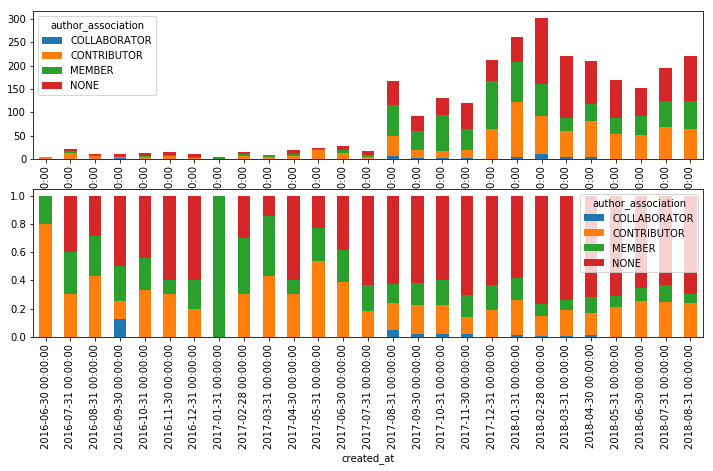

In [250]:
users.sum(axis=1).unstack().fillna(0).plot(kind='bar', stacked=True, ax=subplot(2,1,1))
users.gt(0).sum(axis=1).unstack().fillna(0).apply(lambda s: s/s.sum(), axis=1).plot(kind='bar', stacked=True, ax=subplot(2,1,2))

>> Non-affiliated contributors have like a 4 to 1 adavantage on affiliated contributors.

In [264]:
author_prs = df.closed.groupby([Γ, df.closed, df.pr, df.author_association]).count().unstack().swaplevel(0,2).loc[True]

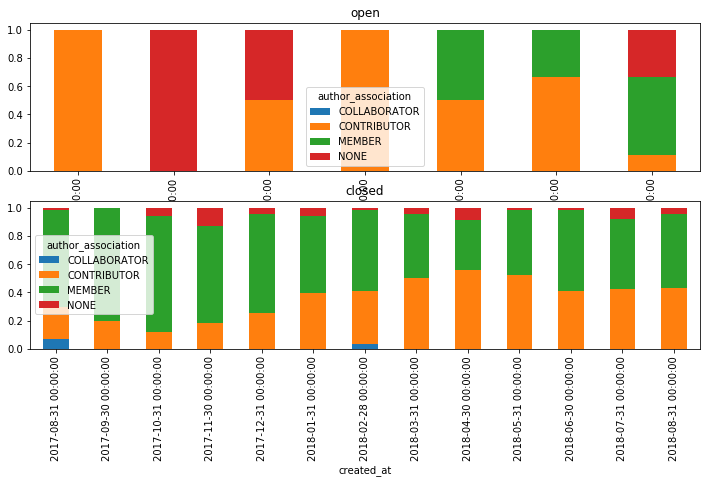

In [267]:
subplot(2,1,1)
author_prs.loc[False].apply(lambda s: s/s.sum(), axis=1).plot(kind='bar', stacked=True, ax=gca(), title='open')
subplot(2,1,2)

author_prs.loc[True].apply(lambda s: s/s.sum(), axis=1).plot(kind='bar', stacked=True, ax=gca(), title='closed')

> Non-affiliated members don't really help proportionally, do they?  

![](http://hollistonreporter.com/pix/articles/2010/10/water%20dripping.gif)